In [446]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_score 
#from sklearn.metrics import f1_score
import pandas as pd
import seaborn as sns
import csv

In [447]:
# binary classification for Normal=0 and Abnormal =1
data= pd.read_csv("C:\\Users\\win10\\Desktop\\column_2C_weka.csv")
data["class"]=data["class"].replace({"Normal":"0"})
data["class"]=data["class"].replace({"Abnormal":"1"})


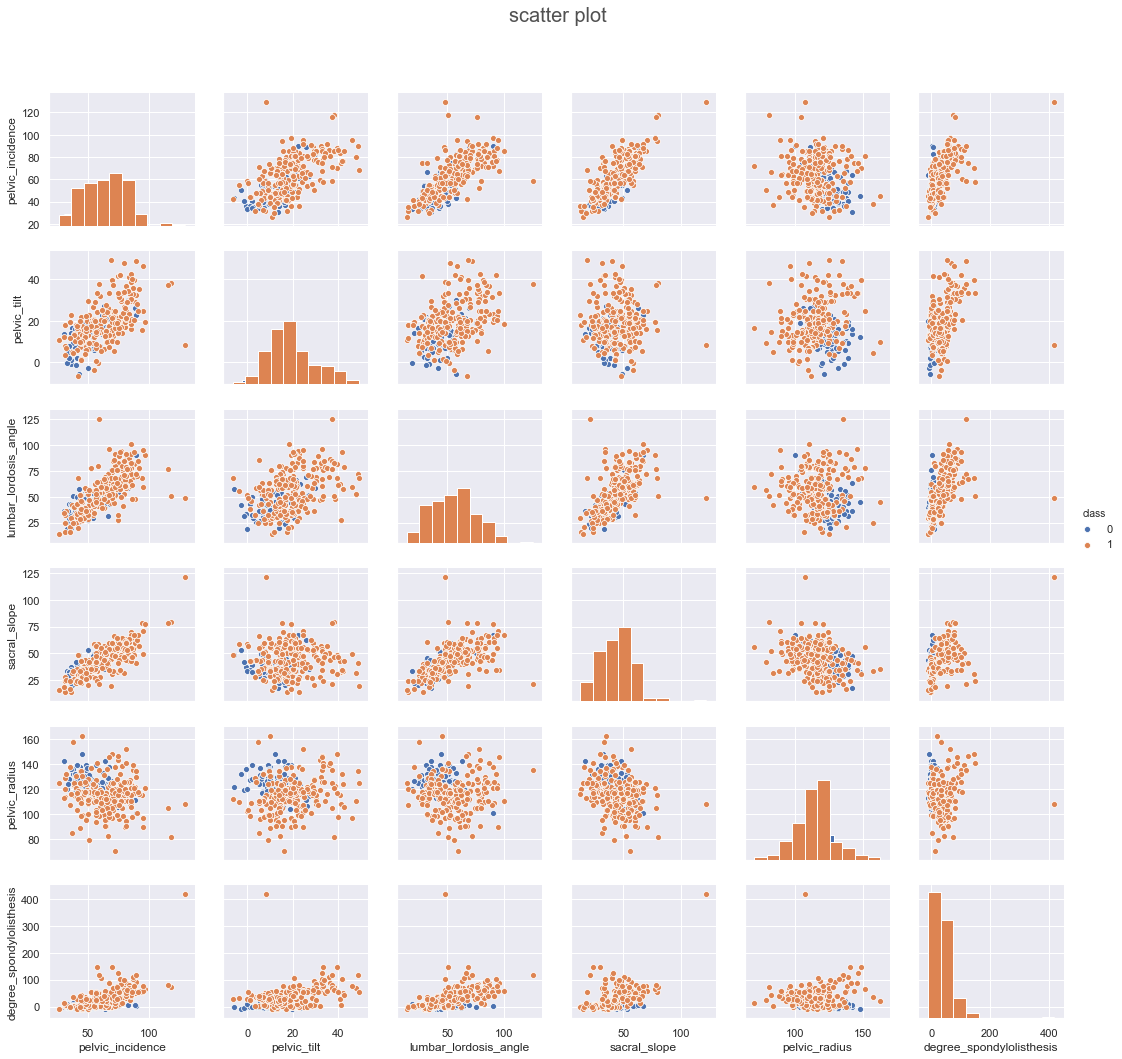

In [448]:
# b(i) scatterplot
data_scatterplot= sns.pairplot(data, vars=["pelvic_incidence", "pelvic_tilt","lumbar_lordosis_angle",
                                           "sacral_slope","pelvic_radius","degree_spondylolisthesis"],
                                hue="class",diag_kind="hist")
data_scatterplot.fig.suptitle("scatter plot",fontsize=20,alpha=0.8)
plt.subplots_adjust(top=0.9)

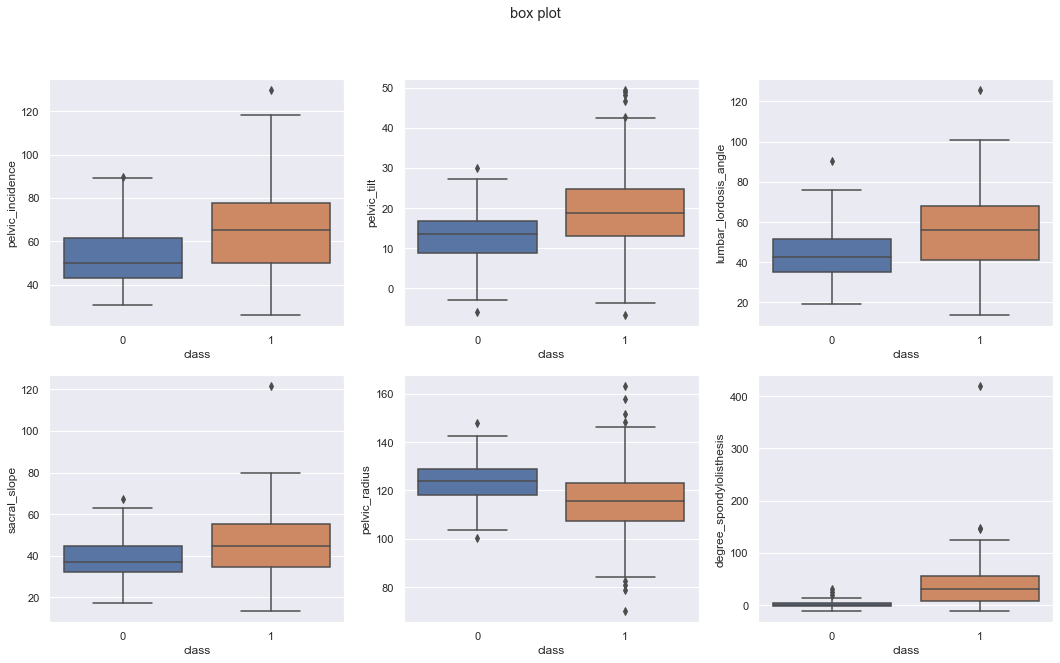

In [449]:
# b(ii) boxplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle("box plot")

data_boxplot= sns.boxplot(ax=axes[0, 0], data=data, x="class", y="pelvic_incidence")
data_boxplot= sns.boxplot(ax=axes[0, 1], data=data, x="class", y="pelvic_tilt")
data_boxplot= sns.boxplot(ax=axes[0, 2], data=data, x="class", y="lumbar_lordosis_angle")
data_boxplot= sns.boxplot(ax=axes[1, 0], data=data, x="class", y="sacral_slope")
data_boxplot= sns.boxplot(ax=axes[1, 1], data=data, x="class", y="pelvic_radius")
data_boxplot= sns.boxplot(ax=axes[1, 2], data=data, x="class", y="degree_spondylolisthesis")


In [450]:
# b(iii) training set & test set 
training_X1=data.loc[data["class"] == "1"]
training_X0=data.loc[data["class"]== "0"]

T1=training_X1.iloc[0:140,1:7].values.tolist()
T0=training_X0.iloc[0:70,1:7].values.tolist()
training_Y1=training_X1.iloc[0:140,7].values.tolist() #length=140
training_Y0=training_X0.iloc[0:70,7].values.tolist() #length=70

training_X=T1+T0 #length=210
training_Y=T1_Y+T0_Y #length=210

In [451]:
test_X1=training_X1.iloc[140:,1:7]
test_X0=training_X0.iloc[70:,1:7]
test_Y1=training_X1.iloc[140:,7] #length=70
test_Y0=training_X0.iloc[70:,7] #length=30

test_X1=test_X1.values.tolist()
test_X0=test_X0.values.tolist()
test_Y1=test_Y1.values.tolist()
test_Y0=test_Y0.values.tolist()

test_X=test_X1+test_X0
test_Y=test_Y1+test_Y0

len(test_X) #length=100
len(test_Y) #length=100


100

In [452]:
# Training set as: training_X & training_Y
# Test set as: test_X & test_Y

In [453]:
# c(i-ii) 

In [454]:
k = [i for i in range(208, 0, -3)]
trainError = []
testError= []

for i in k:
    neighbor = KNeighborsClassifier(n_neighbors = i,p=2) # Euclidean_distance for p = 2.
    neighbor.fit(training_X, training_Y)
    
    trainError.append(neighbor.score(training_X, training_Y))
    testError.append(neighbor.score(test_X, test_Y))
    
print('k*=', k[testError.index(max(testError))])

k*= 4


Text(0, 0.5, 'testError')

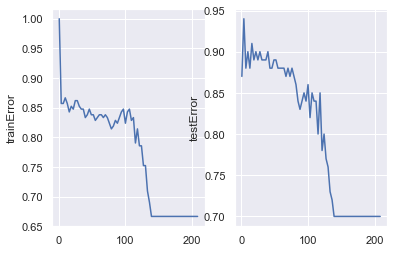

In [455]:
fig, ax = plt.subplots(1,2)
ax[0].plot(k, trainError)
ax[0].set_ylabel('trainError')
ax[1].plot(k, testError)
ax[1].set_ylabel('testError')

In [456]:
# from above calculation, we get the most suitable neighbors is n=4
neighbor = KNeighborsClassifier(n_neighbors = 4,p=2)
neighbor.fit(training_X, training_Y)
prediction=neighbor.predict(test_X)

con_Matrix=confusion_matrix(test_Y,prediction)
con_Matrix #[[25  5]
           # [ 1 69]]


array([[25,  5],
       [ 1, 69]], dtype=int64)

In [457]:
# TP_rate:true positive rate ; TN_rate: true negative rate
TP=con_Matrix[1][1]
TN=con_Matrix[0][0]

FP=con_Matrix[0][1]
FN=con_Matrix[1][0]

TP_rate= TP/(TP+FN)
TN_rate=TN/(TN+FP)

print("True positive rate: ", TP_rate,"True negative rate:",TN_rate)

True positive rate:  0.9857142857142858 True negative rate: 0.8333333333333334


In [458]:
precision=TP/(TP+FP)
print("precision score: ",precision)

precision score:  0.9324324324324325


In [459]:
sensitivity=TP/(TP+FN)
F_1=2*precision*sensitivity/(precision+sensitivity)
print("F_1 score: ",F_1)

F_1 score:  0.9583333333333333


In [460]:
# c (iii) 

In [461]:
N= [i for i in range(10, 211, 10)]
error= []

for i in N:
# choosing the first N/3 rows of Class 0 and the first N − N/3 rows of Class 1 

    training_X_new =T0[:i//3] + T1[:i-i//3]
    training_Y_new =training_Y0[:i//3] + training_Y1[:i-i//3] 

    temp=[]
    k =[j for j in range(1, i, 5)]
    
    for j in k:
        knn = KNeighborsClassifier(n_neighbors = j)
        knn.fit(training_X_new, training_Y_new)
        temp.append(knn.score(test_X, test_Y))
        
    error.append(max(temp))
    

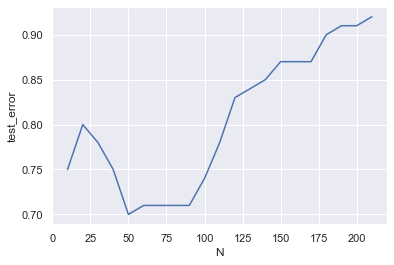

In [462]:
plt.plot(N, error)
plt.xlabel('N')
plt.ylabel('test_error')
plt.show()

In [463]:
# d(i) similar to the code in c(i) Euclidean metric

In [464]:
k = [i for i in range(1, 200, 5)]

manhattanError=[]

for i in k:
    neighbor = KNeighborsClassifier(n_neighbors = i) 
    neighbor.fit(training_X, training_Y)
    
    manhattanError.append(neighbor.score(test_X, test_Y))
    

    
print('k*_manhattan=', k[manhattanError.index(max(manhattanError))])

k*_manhattan= 6


In [465]:
k = [i for i in range(1, 200, 5)]
chebyshevError = []

for i in k:
    neighbor = KNeighborsClassifier(n_neighbors = i, metric = 'chebyshev')
    neighbor.fit(training_X, training_Y)
    
    chebyshevError.append(neighbor.score(test_X, test_Y))
print('k*_chebyshev ', k[chebyshevError.index(max(chebyshevError))])

k*_chebyshev  16


In [466]:
# d(ii)
k = [i for i in range(1, 100, 5)]
mahalanobisError = []
cov = np.cov(training_X,rowvar=False)

for i in k:
    neighbor = KNeighborsClassifier(n_neighbors = i, metric = "mahalanobis", metric_params = {'V': cov})
    neighbor.fit(training_X, training_Y)
    mahalanobisError.append(neighbor.score(test_X, test_Y))
print('k*_mahalanobis= ', k[mahalanobisError.index(max(mahalanobisError))])

k*_mahalanobis=  1


In [467]:
# e: sorry,do not know how to cpmpute this problem (no time left)

In [ ]:
# f: lowest training error rate = 0 